# Question:
Go to this given URL and solve the following questions<br>
URL: https://www.youtube.com/@PW-Foundation/videos<br>
Q1. Write a python program to extract the video URL of the first five videos.<br>
Q2. Write a python program to extract the URL of the video thumbnails of the first five videos.<br>
Q3. Write a python program to extract the title of the first five videos.<br>
Q4. Write a python program to extract the number of views of the first five videos.<br>
Q5. Write a python program to extract the time of posting of video for the first five videos.<br>
Note: Save all the data scraped in the above questions in a CSV file.<br>

## Answer:

**app.py**

In [ ]:
from flask import Flask, render_template, request, jsonify
from flask_cors import CORS,cross_origin
import logging
import os
import requests
import re
import pandas as pd

BASE_DIR = os.path.dirname(os.path.abspath(__file__))
logging.basicConfig(filename=os.path.join(BASE_DIR, "scraper_logs.log") , level=logging.INFO)

app = Flask(__name__)	

@app.route("/", methods=["GET"])
@cross_origin()
def index():
	return render_template('index.html')

@app.route("/details", methods=["GET","POST"])
@cross_origin()
def details():
	if request.method == "POST":
		try:
			input_text = request.form['text']
			url = f'https://www.youtube.com/@{input_text}/videos'
			headers = {
			'User-Agent': 'Mozilla/5.0 (Windows NT 10.0; rv:91.0) Gecko/20100101 Firefox/91.0',
			'Accept-Language': 'en-US,en;q=0.9'
			}

			logging.info("Requesting HTML...")
			response = requests.get(url, headers=headers)
			response_text = response.text

			#titles
			logging.info("Finding titles...")
			vid_titles = re.findall('"title":{"runs":\[{"text":".*?"', response_text)

			#thumbnails
			logging.info("Finding thumbnails...")
			vid_thumbnails = re.findall(r"https://i.ytimg.com/vi/[A-Za-z0-9_]{11}/[A-Za-z0-9_-]{9}.jpg", response_text)

			#links
			logging.info("Finding links...")
			vid_links = re.findall(r"watch\?v=[A-Za-z0-9_-]{11}", response_text)

			#view count
			logging.info("Finding view counts...")
			pattern3 = re.compile(r"[0-9]+(\.[0-9]+)?[a-zA-Z]*K views")

			#time posted
			logging.info("Finding videos age...")
			pattern4 = re.compile(r"\d+ (minutes|hours|hour|days|day|weeks|week|years|year) ago")

			matches1 = pattern3.finditer(response_text)
			matches2 = pattern4.finditer(response_text)

			vid_viewcounts=[]
			vid_ages=[]
			count = 0
			for match1,match2 in zip(matches1,matches2):
				vid_ages.append(match2[0])
				vid_viewcounts.append(match1[0])

			logging.info("Storing titles...")
			titles = vid_titles[0:10]
			logging.info("Storing thumbnails...")
			thumbnails = list(dict.fromkeys(vid_thumbnails))
			logging.info("Storing links...")
			links = vid_links[0:10]
			logging.info("Storing viewcounts...")
			viewcounts=vid_viewcounts[0:20:2]
			logging.info("Storing videos age...")
			ages=vid_ages[0:20:2]

			details_list=[]

			for title,thumbnail,link,viewcount,age in zip(titles,thumbnails,links,viewcounts,ages):
				details_dict={
				"title":title.split('"')[-2], "thumbnail": thumbnail, "link": "https://www.youtube.com/"+link,
				"viewcount": viewcount, "age": age
				}
				details_list.append(details_dict)

			#storing data into a csv file
			df = pd.DataFrame(details_list)
			df.to_csv('YTscrapData.csv', index=False)

			return render_template('details.html', details=details_list, channel=input_text)
		

		except Exception as e:
			print(e)

if __name__ == "__main__":
	app.run(host='127.0.0.1', port=8000, debug=True)
	#app.run(debug = True)

Link to the csv file: https://github.com/liskibruh/youtube-scraper2/blob/main/YTscrapData.csv <br>
**Here's how the data looks in the csv file:** 

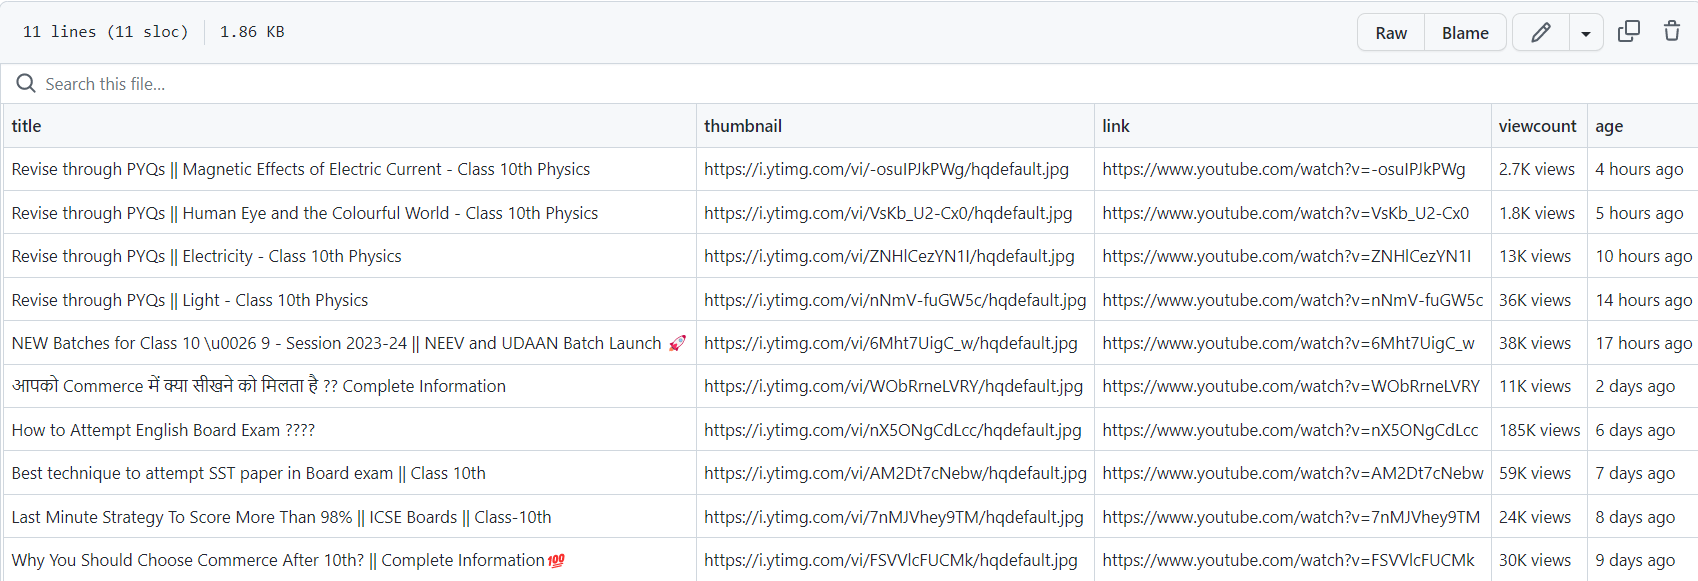

# App running

**home page**

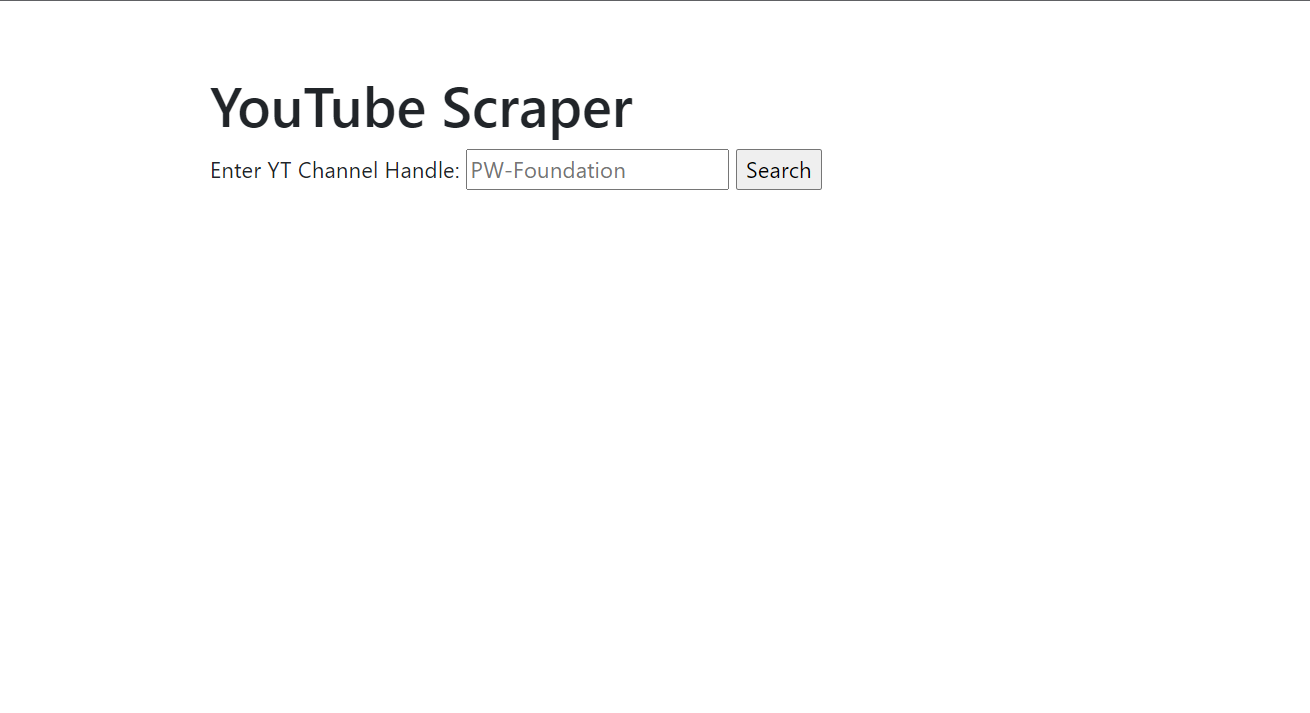

**results page:**
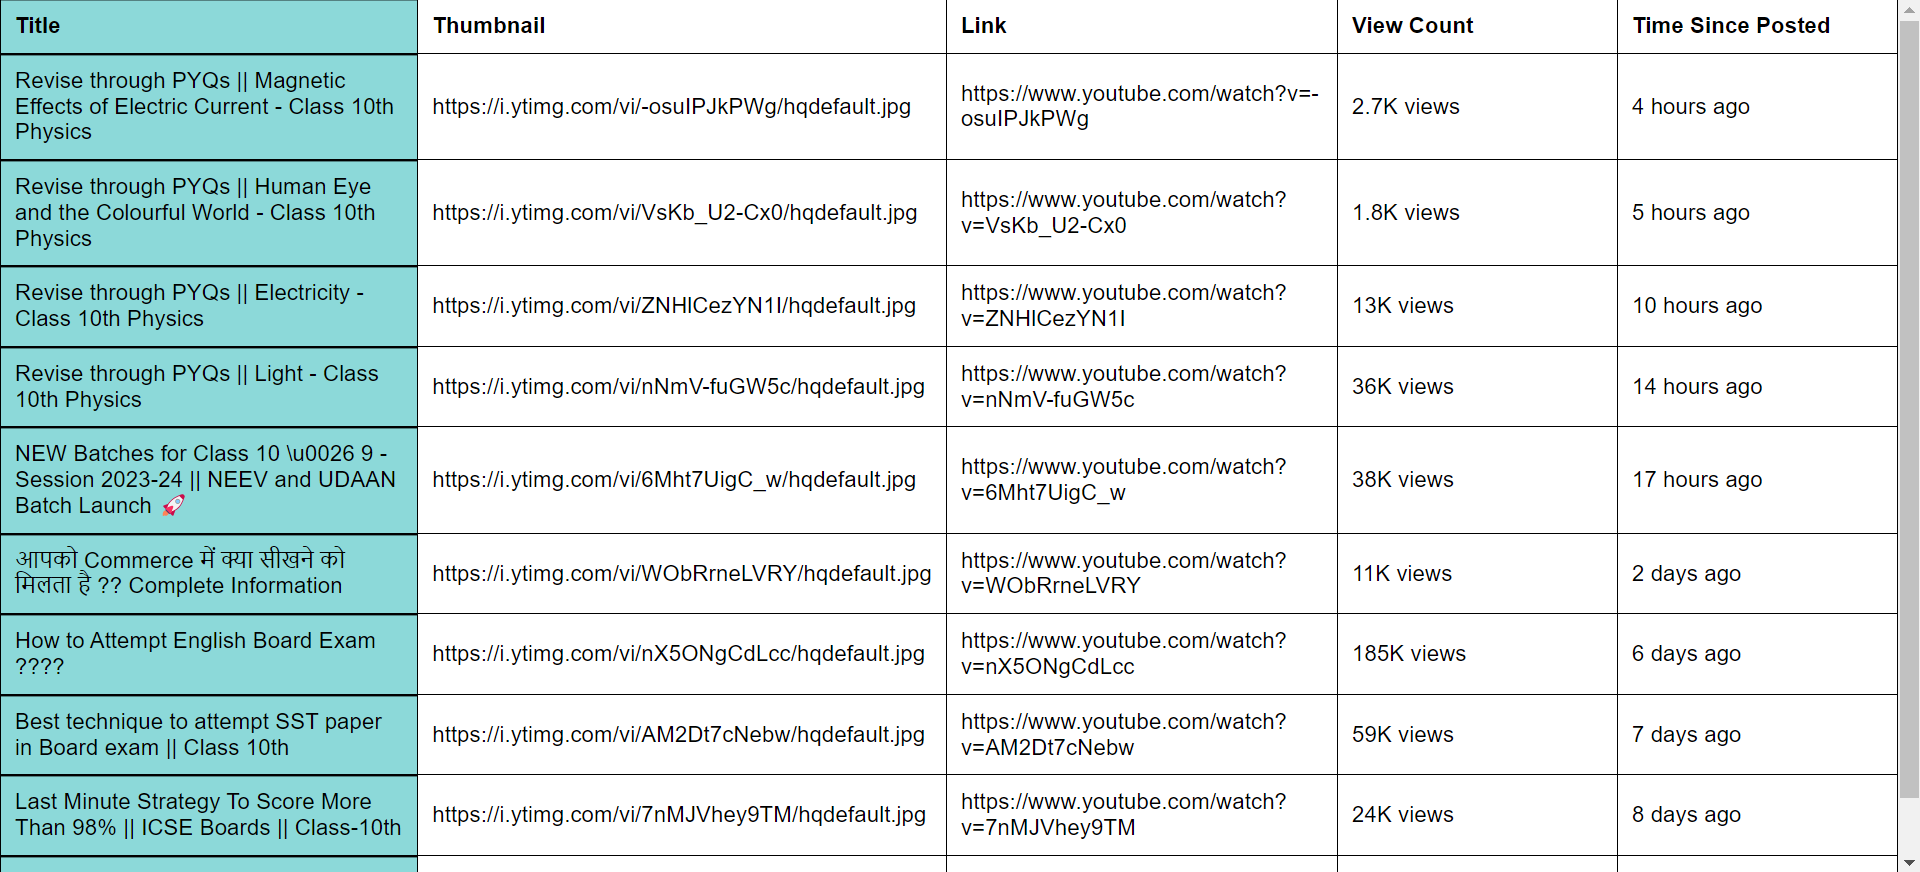

### Link to the GitHub Repo of the project: 
It contains all the files and everything regarding this project<br>
**https://github.com/liskibruh/youtube-scraper2**